In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class LinearRegression():
    """
    Constructor takes two arguments 
    X : Numpy array of size m * n where m is number of training examples and n is number of features (including bias) 
        Each row contains features (including bias) of a single training example       
    y : Numpy array of size m * 1 where m is number of training examples 
        Each row contains ground truth for the each training example
    """
    
    def __init__(self, X, y):
        """
        Initializes required variables
        theta : theta is a numpy array of size n * 1
                This is a vector of model parameters
        """
        self.X = X
        self.y = y
        self.m, self.n = X.shape
        self.theta = np.zeros((self.n, 1))
    
    def meanSquaredError(self, reg_coeff = 0):
        """
        This method takes 
        reg_coeff : Regularization co-efficient
        
        This functions calculates regularized cost and returns a tuple containing cost and gradients
        """
        prediction = np.dot(self.X, self.theta)
        cost = np.sum(np.power(prediction - self.y, 2)) / (2 * self.m) + (reg_coeff / (2 * self.m)) * (np.dot(np.transpose(self.theta), self.theta)[0][0] - self.theta[0]**2)
        grads = np.dot(np.transpose(self.X), prediction - self.y) / self.m + (reg_coeff / self.m) * self.theta
        return cost, grads
    
    def gradientDescent(self, cost_grad_func, iters, alpha, reg_coeff = 0):
        """
        This method takes 
        cost_grad_func : This is a function that returns cost and gradients.
        iters : Number iterations to be done in gradient descent
        alpha : This is the learning rate
        reg_coeff : Regularization co-efficient
        
        This functions optimizes the cost function by adjusting theta
        This returns a list containing cost at each iteration.
        """
        cost_history = []
        for i in range(iters):
            cost, grads = cost_grad_func(reg_coeff)
            self.theta = self.theta - alpha * grads
            cost_history.append(cost)
        return cost_history
    
    def fit(self, cost_func : str, optimizer : str, alpha : float = 0.001, iters : int = 100, reg_coeff : float= 0):
        """
        This method takes
        cost_func : String specifying which cost function to use 
                    This can take "mse" or "meanSqauredError"  for mean squared error
                    More cost functions would be added in future
        optimizer : String specifying which optimization function to use 
                    This can take "gd" or "gradientDescent"  for Gradient Descent
                    More optimizers would be added in future
        alpha : Learning rate for optimization function (if applicable)
        iters : Specify number of iterations for optimization function (if applicable)
        reg_coeff : Regularization co-efficient
        
        
        This method fits the curve to the data and returns a tuple containing cost_history and optimized theta  
        """
        self.theta = np.zeros((self.n,1))
        cost_functions = {"mse":self.meanSquaredError, "meanSquaredError":self.meanSquaredError}
        optimizers = {"gd":self.gradientDescent(cost_functions[cost_func], iters, alpha, reg_coeff)
                     ,"gradientDescent":self.gradientDescent(cost_functions[cost_func], iters, alpha, reg_coeff)
                     }    
        return optimizers[optimizer], self.theta
    def predict(self, X):
        """
        This function takes:
        X : Numpy array where each row contains features of examples
        
        This functions returns the predictions for the given examples
        Ideally you'd want to call this after fitting curve using fit()
        """
        return np.dot(X, np.theta)

In [3]:
#sample data
data = np.array([[1,6.1101,17.592],[1,5.5277,9.1302],[1,8.5186,13.662],[1,7.0032,11.854],[1,5.8598,6.8233],[1,8.3829,11.886],[1,7.4764,4.3483],[1,8.5781,12],[1,6.4862,6.5987],[1,5.0546,3.8166],[1,5.7107,3.2522],[1,14.164,15.505],[1,5.734,3.1551],[1,8.4084,7.2258],[1,5.6407,0.71618],[1,5.3794,3.5129],[1,6.3654,5.3048],[1,5.1301,0.56077],[1,6.4296,3.6518],[1,7.0708,5.3893],[1,6.1891,3.1386],[1,20.27,21.767],[1,5.4901,4.263],[1,6.3261,5.1875],[1,5.5649,3.0825],[1,18.945,22.638],[1,12.828,13.501],[1,10.957,7.0467],[1,13.176,14.692],[1,22.203,24.147],[1,5.2524,-1.22],[1,6.5894,5.9966],[1,9.2482,12.134],[1,5.8918,1.8495],[1,8.2111,6.5426],[1,7.9334,4.5623],[1,8.0959,4.1164],[1,5.6063,3.3928],[1,12.836,10.117],[1,6.3534,5.4974],[1,5.4069,0.55657],[1,6.8825,3.9115],[1,11.708,5.3854],[1,5.7737,2.4406],[1,7.8247,6.7318],[1,7.0931,1.0463],[1,5.0702,5.1337],[1,5.8014,1.844],[1,11.7,8.0043],[1,5.5416,1.0179],[1,7.5402,6.7504],[1,5.3077,1.8396],[1,7.4239,4.2885],[1,7.6031,4.9981],[1,6.3328,1.4233],[1,6.3589,-1.4211],[1,6.2742,2.4756],[1,5.6397,4.6042],[1,9.3102,3.9624],[1,9.4536,5.4141],[1,8.8254,5.1694],[1,5.1793,-0.74279],[1,21.279,17.929],[1,14.908,12.054],[1,18.959,17.054],[1,7.2182,4.8852],[1,8.2951,5.7442],[1,10.236,7.7754],[1,5.4994,1.0173],[1,20.341,20.992],[1,10.136,6.6799],[1,7.3345,4.0259],[1,6.0062,1.2784],[1,7.2259,3.3411],[1,5.0269,-2.6807],[1,6.5479,0.29678],[1,7.5386,3.8845],[1,5.0365,5.7014],[1,10.274,6.7526],[1,5.1077,2.0576],[1,5.7292,0.47953],[1,5.1884,0.20421],[1,6.3557,0.67861],[1,9.7687,7.5435],[1,6.5159,5.3436],[1,8.5172,4.2415],[1,9.1802,6.7981],[1,6.002,0.92695],[1,5.5204,0.152],[1,5.0594,2.8214],[1,5.7077,1.8451],[1,7.6366,4.2959],[1,5.8707,7.2029],[1,5.3054,1.9869],[1,8.2934,0.14454],[1,13.394,9.0551],[1,5.4369,0.61705]])


In [4]:
#seperating labels from features
X = data[:,:2]
y = data[:,2:3]

In [5]:
classifier = LinearRegression(X, y)
cost_history, theta = classifier.fit("mse","gd",0.003,100)

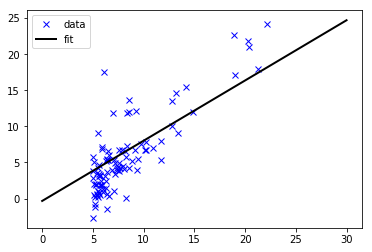

In [6]:
plt.plot(X[:,1:], y, 'bx',label = 'data')
plt.rcParams["figure.figsize"] = (20,10)
plt.plot([0, 30], [theta[0][0], theta[0][0] + 30 * theta[1][0]],'k-',lw=2,label = 'fit')
plt.legend()

In [7]:
cost_histories = []
alphas = [0.01,0.003,0.001,0.0003]
for alpha in alphas:
    cost_histories.append(classifier.fit("mse", "gd", alpha, 100))
    

Following two plots show cost variation for different learning rates 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3<br>
<ul>
<li>In first plot as the learning rate increases from 0.0003 gradient descend converges in less iterations until 0.01</li>
<li>In second plot for even higher learning rates the cost increases and gradient descent doesn't converge</li></ul>
<p><b>Note:&nbsp;</b>First plot has linear y scale whereas second one has logarithmic y scale</p>

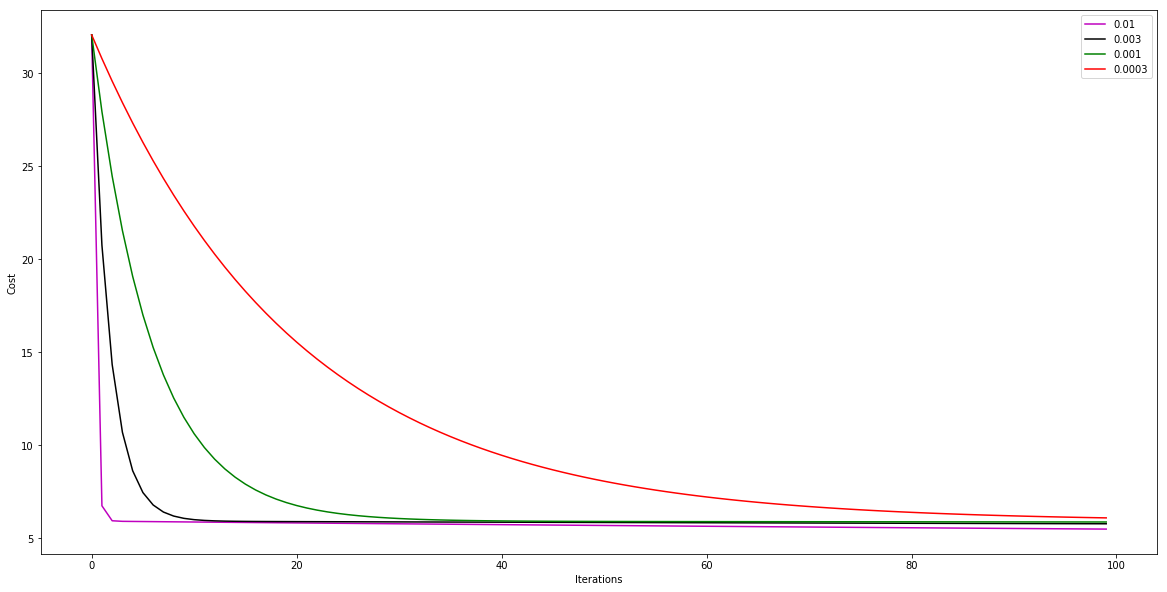

In [8]:
colors = ['m', 'k', 'g', 'r', 'o', 'b', 'y']
plt.rcParams["figure.figsize"] = (20,10)
for i in range(len(cost_histories)):
    plt.plot(range(len(cost_histories[i][0])), cost_histories[i][0], colors[i]+"-", label = alphas[i])
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

In [9]:
large_alphas = [0.03, 0.1, 0.3]
cost_histories_2 = []
for alpha in large_alphas:
    cost_histories_2.append(classifier.fit("mse", "gd", alpha, 100))

c:\users\mst\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
c:\users\mst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in power
c:\users\mst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply
c:\users\mst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
c:\users\mst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract


Cost variation 

c:\users\mst\appdata\local\programs\python\python36\lib\site-packages\matplotlib\ticker.py:2177: RuntimeWarning: overflow encountered in power
  ticklocs = b ** decades
c:\users\mst\appdata\local\programs\python\python36\lib\site-packages\matplotlib\ticker.py:1099: RuntimeWarning: invalid value encountered in double_scalars
  coeff = np.round(x / b ** exponent)


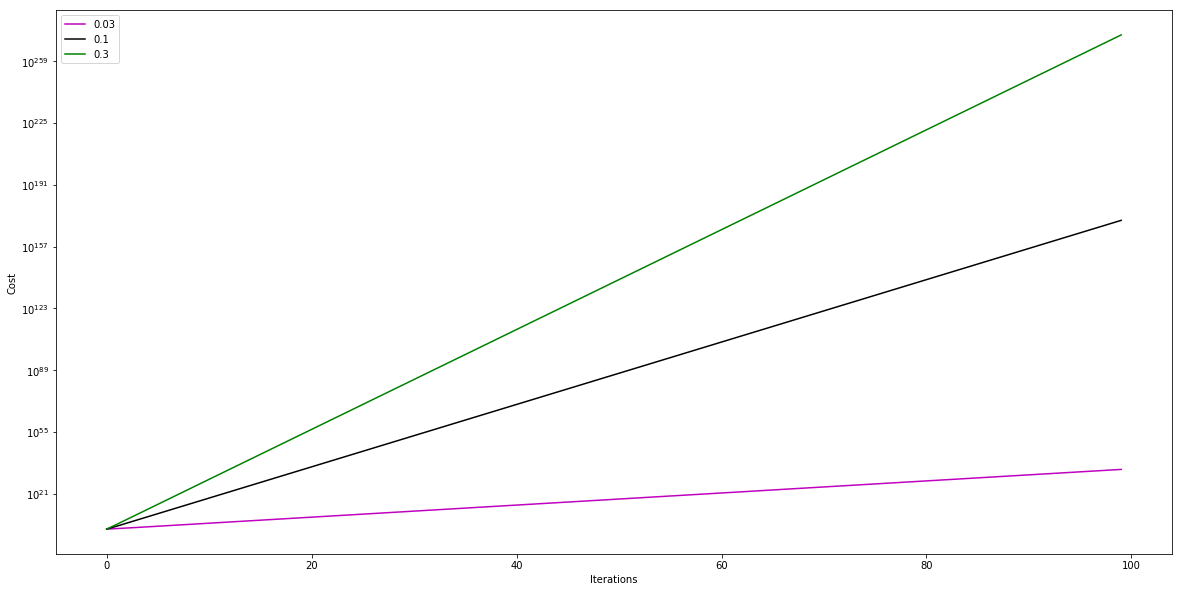

In [10]:
plt.rcParams["figure.figsize"] = (20,10)
for i in range(len(cost_histories_2)):
    plt.plot(range(len(cost_histories_2[i][0])), cost_histories_2[i][0], colors[i]+"-", label = large_alphas[i])
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.yscale("log")
plt.legend()
axes=plt.gca()

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

theta_0 = np.arange(-10.0, 10.0, 0.2)
theta_1 = np.arange(-1,4,0.05)
theta_0, theta_1 = np.meshgrid(theta_0, theta_1)


In [12]:
cost_matrix=[]
for i in range(theta_0.shape[0]):
    for j in range(theta_1.shape[1]):
        classifier.theta = np.array([[theta_0[i][j]],[theta_1[i][j]]])
        cost_matrix.append(classifier.meanSquaredError()[0][0])

In [13]:
cost_matrix = np.array(cost_matrix).reshape(theta_1.shape)

Following show cost variation w.r.t parameters theta_0 and theta_1

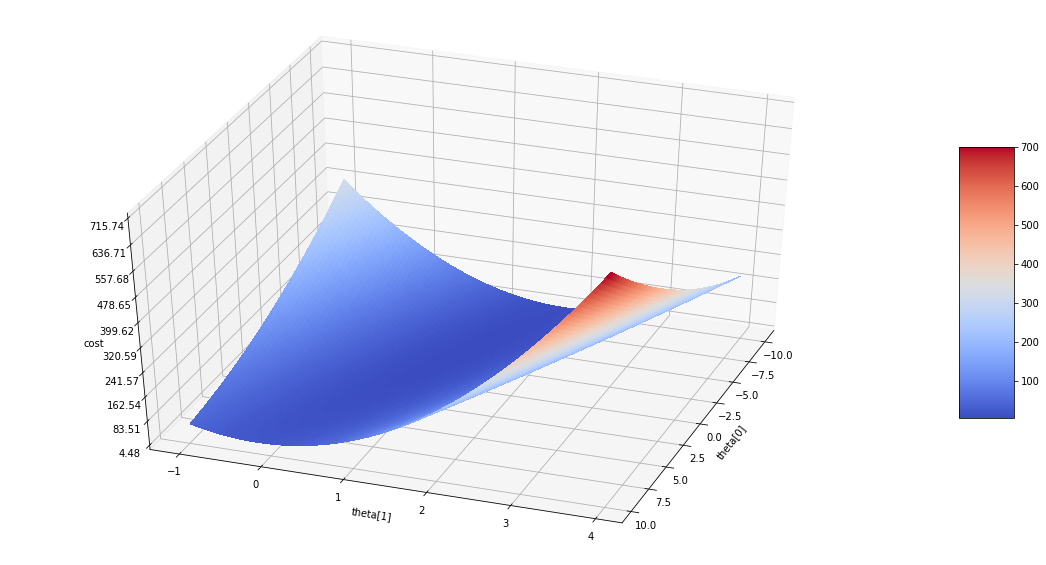

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(theta_0, theta_1, cost_matrix, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)


ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("theta[0]")
ax.set_ylabel("theta[1]")
ax.set_zlabel("cost")
ax.view_init(elev=40, azim=20)
